In [2]:
import numpy as np 
import pandas as pd 
import os

#Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
# import pycountry
# import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import folium
from folium import Choropleth, Circle, Marker
from folium import plugins
from folium.plugins import HeatMap, MarkerCluster
from plotly.offline import init_notebook_mode, iplot
from plotly.subplots import make_subplots


In [3]:
city_day = pd.read_csv('city_knn.csv')
city_day

Unnamed: 0  level_0  index           City        Date      PM2.5  \
0               0        0      0      Ahmedabad  2015-01-01  67.450578   
1               1        1      1      Ahmedabad  2015-01-02  67.450578   
2               2        2      2      Ahmedabad  2015-01-03  67.450578   
3               3        3      3      Ahmedabad  2015-01-04  67.450578   
4               4        4      4      Ahmedabad  2015-01-05  67.450578   
...           ...      ...    ...            ...         ...        ...   
29526       29526    29526  29526  Visakhapatnam  2020-06-27  15.020000   
29527       29527    29527  29527  Visakhapatnam  2020-06-28  24.380000   
29528       29528    29528  29528  Visakhapatnam  2020-06-29  22.910000   
29529       29529    29529  29529  Visakhapatnam  2020-06-30  16.640000   
29530       29530    29530  29530  Visakhapatnam  2020-07-01  15.000000   

             PM10     NO    NO2    NOx        NH3     CO    SO2      O3  \
0      118.127103   0.92  18.22  17.15  23.483476   0.92  27.64  133.36   
1      118.127103   0.97  15.69  16.46  23.483476   0.97  24.55   34.06   
2      118.127103  17.40  19.30  29.70  23.483476  17.40  29.07   30.70   
3      118.127103   1.70  18.48  17.97  23.483476   1.70  18.59   36.08   
4      118.127103  22.10  21.42  37.76  23.483476  22.10  39.33   39.31   
...           ...    ...    ...    ...        ...    ...    ...     ...   
29526   50.940000   7.68  25.06  19.54  12.470000   0.47   8.55   23.30   
29527   74.090000   3.42  26.06  16.53  11.990000   0.52  12.72   30.14   
29528   65.730000   3.45  29.53  18.33  10.710000   0.48   8.42   30.96   
29529   49.970000   4.05  29.26  18.80  10.030000   0.52   9.84   28.30   
29530   66.000000   0.40  26.85  14.05   5.200000   0.59   2.10   17.05   

       Benzene    Toluene    Xylene         AQI    AQI_Bucket  
0      0.00000   0.020000  0.000000  166.463581      Moderate  
1      3.68000   5.500000  3.770000  166.463581      Moderate  
2      6.80000  16.400000  2.250000  166.463581      Moderate  
3      4.43000  10.140000  1.000000  166.463581      Moderate  
4      7.01000  18.890000  2.780000  166.463581      Moderate  
...        ...        ...       ...         ...           ...  
29526  2.24000  12.070000  0.730000   41.000000          Good  
29527  0.74000   2.210000  0.380000   70.000000  Satisfactory  
29528  0.01000   0.010000  0.000000   68.000000  Satisfactory  
29529  0.00000   0.000000  0.000000   54.000000  Satisfactory  
29530  3.28084   8.700972  3.070128   50.000000          Good  

[29531 rows x 19 columns]

In [4]:
city_day.isnull().sum()

Unnamed: 0    0
level_0       0
index         0
City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [5]:
cities = city_day['City'].value_counts()
print(f'Total number of cities in the dataset : {len(cities)}')
print(cities.index)

Total number of cities in the dataset : 26
Index(['Chennai', 'Delhi', 'Lucknow', 'Mumbai', 'Bengaluru', 'Ahmedabad',
       'Hyderabad', 'Patna', 'Gurugram', 'Visakhapatnam', 'Amritsar',
       'Jorapokhar', 'Jaipur', 'Thiruvananthapuram', 'Amaravati',
       'Brajrajnagar', 'Talcher', 'Kolkata', 'Guwahati', 'Coimbatore',
       'Shillong', 'Chandigarh', 'Bhopal', 'Kochi', 'Ernakulam', 'Aizawl'],
      dtype='object')


In [6]:

city_day['Date'] = pd.to_datetime(city_day['Date'])
city_day

Unnamed: 0  level_0  index           City       Date      PM2.5  \
0               0        0      0      Ahmedabad 2015-01-01  67.450578   
1               1        1      1      Ahmedabad 2015-01-02  67.450578   
2               2        2      2      Ahmedabad 2015-01-03  67.450578   
3               3        3      3      Ahmedabad 2015-01-04  67.450578   
4               4        4      4      Ahmedabad 2015-01-05  67.450578   
...           ...      ...    ...            ...        ...        ...   
29526       29526    29526  29526  Visakhapatnam 2020-06-27  15.020000   
29527       29527    29527  29527  Visakhapatnam 2020-06-28  24.380000   
29528       29528    29528  29528  Visakhapatnam 2020-06-29  22.910000   
29529       29529    29529  29529  Visakhapatnam 2020-06-30  16.640000   
29530       29530    29530  29530  Visakhapatnam 2020-07-01  15.000000   

             PM10     NO    NO2    NOx        NH3     CO    SO2      O3  \
0      118.127103   0.92  18.22  17.15  23.483476   0.92  27.64  133.36   
1      118.127103   0.97  15.69  16.46  23.483476   0.97  24.55   34.06   
2      118.127103  17.40  19.30  29.70  23.483476  17.40  29.07   30.70   
3      118.127103   1.70  18.48  17.97  23.483476   1.70  18.59   36.08   
4      118.127103  22.10  21.42  37.76  23.483476  22.10  39.33   39.31   
...           ...    ...    ...    ...        ...    ...    ...     ...   
29526   50.940000   7.68  25.06  19.54  12.470000   0.47   8.55   23.30   
29527   74.090000   3.42  26.06  16.53  11.990000   0.52  12.72   30.14   
29528   65.730000   3.45  29.53  18.33  10.710000   0.48   8.42   30.96   
29529   49.970000   4.05  29.26  18.80  10.030000   0.52   9.84   28.30   
29530   66.000000   0.40  26.85  14.05   5.200000   0.59   2.10   17.05   

       Benzene    Toluene    Xylene         AQI    AQI_Bucket  
0      0.00000   0.020000  0.000000  166.463581      Moderate  
1      3.68000   5.500000  3.770000  166.463581      Moderate  
2      6.80000  16.400000  2.250000  166.463581      Moderate  
3      4.43000  10.140000  1.000000  166.463581      Moderate  
4      7.01000  18.890000  2.780000  166.463581      Moderate  
...        ...        ...       ...         ...           ...  
29526  2.24000  12.070000  0.730000   41.000000          Good  
29527  0.74000   2.210000  0.380000   70.000000  Satisfactory  
29528  0.01000   0.010000  0.000000   68.000000  Satisfactory  
29529  0.00000   0.000000  0.000000   54.000000  Satisfactory  
29530  3.28084   8.700972  3.070128   50.000000          Good  

[29531 rows x 19 columns]

In [7]:
pollutants = ['PM2.5','PM10','NO2', 'CO', 'SO2','O3','Benzene','Toluene','Xylene']

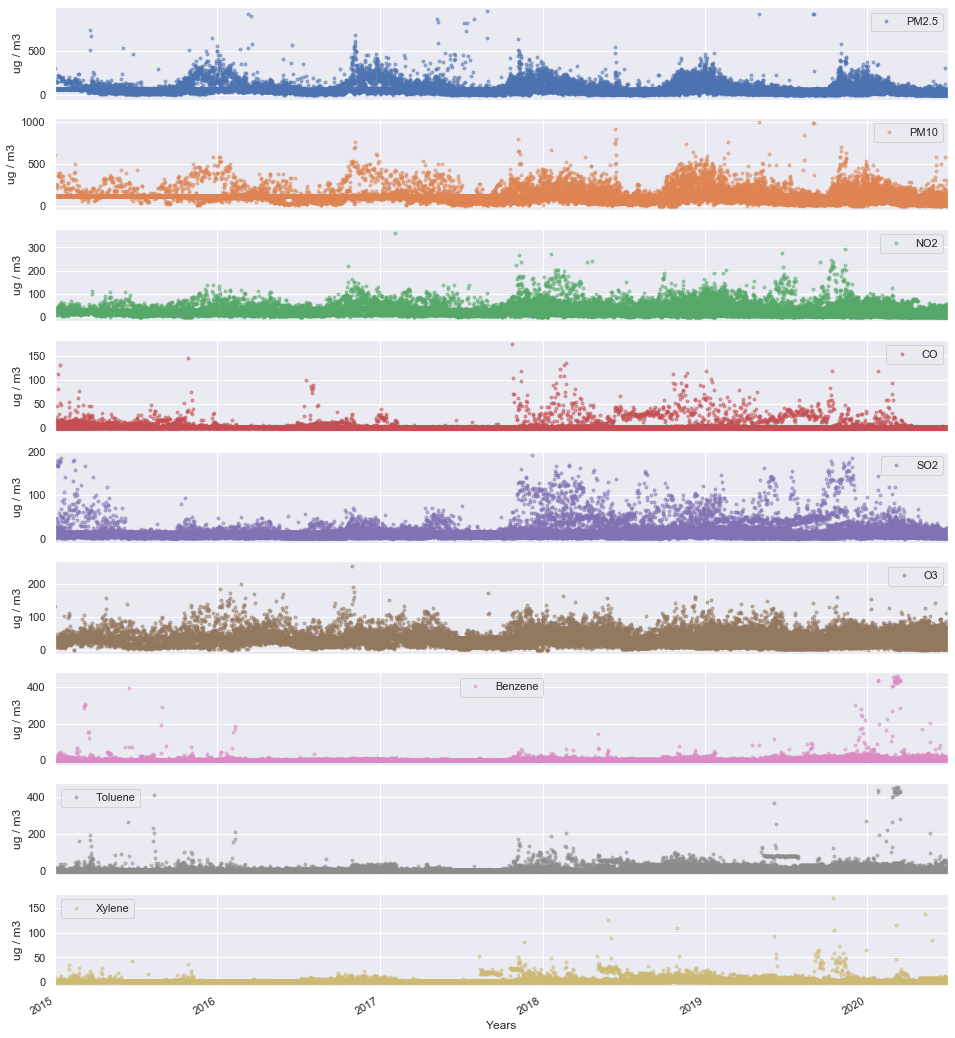

In [8]:
city_day.set_index('Date',inplace=True)
axes = city_day[pollutants].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 20), subplots=True)
for ax in axes:
    
    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')

In [9]:
def max_polluted_city(pollutant):
    x1 = city_day[[pollutant,'City']].groupby(["City"]).mean().sort_values(by=pollutant,ascending=False).reset_index()
    x1[pollutant] = round(x1[pollutant],2)
    return x1[:10].style.background_gradient(cmap='OrRd')

In [10]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.render()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)



In [11]:
pm2_5 = max_polluted_city('PM2.5')
pm10 = max_polluted_city('PM10')
no2 = max_polluted_city('NO2')
so2 = max_polluted_city('SO2')
co = max_polluted_city('CO')



display_side_by_side(pm2_5,pm10,no2,so2,co)

City PM2.5 
 
 0 
 Delhi 
 117.15 
 
 
 1 
 Patna 
 113.82 
 
 
 2 
 Gurugram 
 112.55 
 
 
 3 
 Lucknow 
 107.57 
 
 
 4 
 Ahmedabad 
 67.73 
 
 
 5 
 Jorapokhar 
 66.41 
 
 
 6 
 Brajrajnagar 
 64.73 
 
 
 7 
 Kolkata 
 64.57 
 
 
 8 
 Guwahati 
 63.69 
 
 
 9 
 Talcher 
 62.61 
 
 City PM10 
 
 0 
 Delhi 
 228.41 
 
 
 1 
 Talcher 
 156.55 
 
 
 2 
 Gurugram 
 150.47 
 
 
 3 
 Jorapokhar 
 142.24 
 
 
 4 
 Jaipur 
 123.42 
 
 
 5 
 Brajrajnagar 
 123.09 
 
 
 6 
 Bhopal 
 119.29 
 
 
 7 
 Patna 
 119.01 
 
 
 8 
 Lucknow 
 118.13 
 
 
 9 
 Ahmedabad 
 117.41 
 
 City NO2 
 
 0 
 Delhi 
 50.76 
 
 
 1 
 Ahmedabad 
 49.81 
 
 
 2 
 Kolkata 
 40.03 
 
 
 3 
 Patna 
 36.51 
 
 
 4 
 Visakhapatnam 
 35.73 
 
 
 5 
 Lucknow 
 33.19 
 
 
 6 
 Jaipur 
 32.37 
 
 
 7 
 Bhopal 
 31.26 
 
 
 8 
 Coimbatore 
 28.78 
 
 
 9 
 Hyderabad 
 28.39 
 
 City SO2 
 
 0 
 Ahmedabad 
 42.28 
 
 
 1 
 Jorapokhar 
 27.91 
 
 
 2 
 Talcher 
 25.6 
 
 
 3 
 Patna 
 21.29 
 
 
 4 
 Kochi 
 17.6 
 
 
 5 
 Delhi 
 15.83 
 
 
 6 
 Mumbai 
 14.79 
 
 
 7 
 Guwahati 
 14.66 
 
 
 8 
 Amaravati 
 14.28 
 
 
 9 
 Bhopal 
 13.11 
 
 City CO 
 
 0 
 Ahmedabad 
 16.15 
 
 
 1 
 Lucknow 
 2.13 
 
 
 2 
 Delhi 
 1.98 
 
 
 3 
 Talcher 
 1.91 
 
 
 4 
 Brajrajnagar 
 1.87 
 
 
 5 
 Bengaluru 
 1.84 
 
 
 6 
 Ernakulam 
 1.64 
 
 
 7 
 Patna 
 1.59 
 
 
 8 
 Jorapokhar 
 1.36 
 
 
 9 
 Gurugram 
 1.32

In [12]:
def trend_plot(dataframe,value):
    
    # Prepare data
    df['year'] = [d.year for d in df.Date]
    df['month'] = [d.strftime('%b') for d in df.Date]
    years = df['year'].unique()

    # Draw Plot
    fig, axes = plt.subplots(1, 2, figsize=(14,6), dpi= 80)
    sns.boxplot(x='year', y=value, data=df, ax=axes[0])
    sns.pointplot(x='month', y=value, data=df.loc[~df.year.isin([2015, 2020]), :])

    # Set Title
    axes[0].set_title('Year-wise Box Plot \n(The Trend)', fontsize=18); 
    axes[1].set_title('Month-wise Plot \n(The Seasonality)', fontsize=18)
    plt.show()

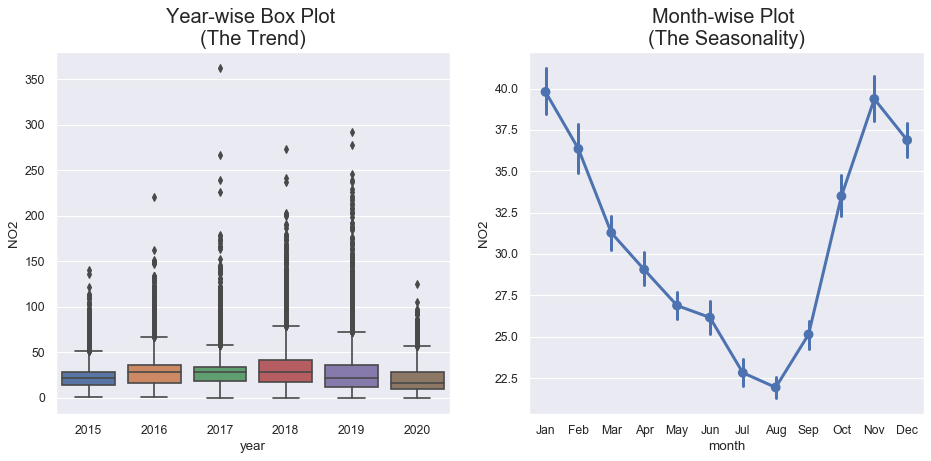

In [13]:
city_day.reset_index(inplace=True)
df = city_day.copy()
value='NO2'
trend_plot(df,value)

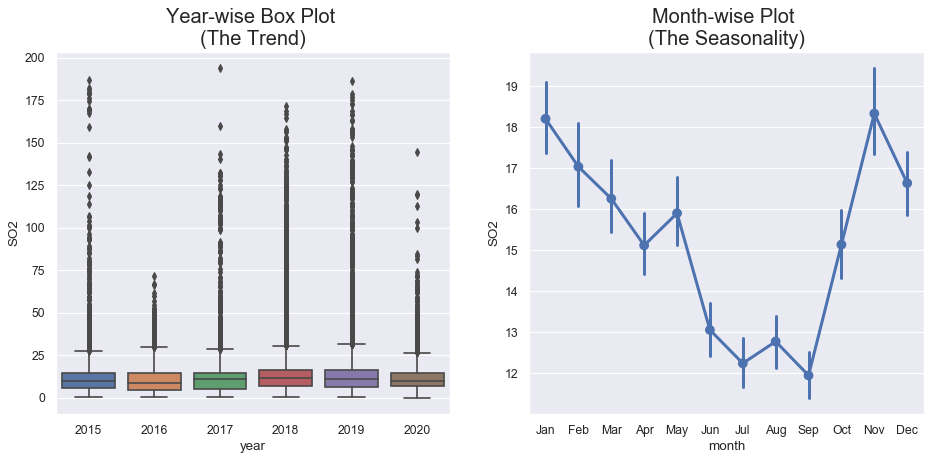

In [14]:
value='SO2'
trend_plot(df,value)

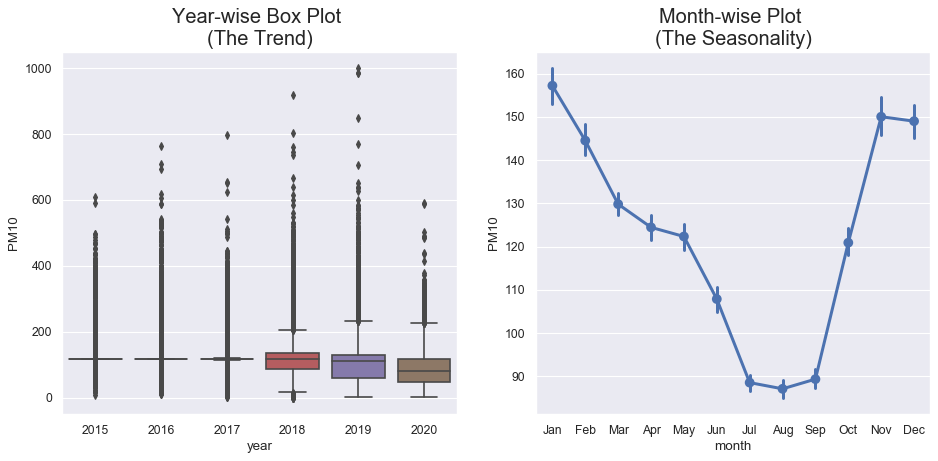

In [15]:
value='PM10'
trend_plot(df,value)

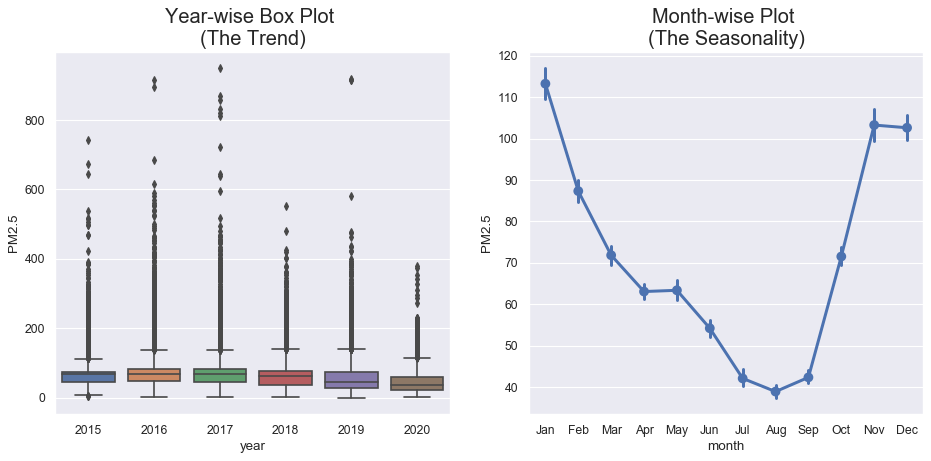

In [16]:
value='PM2.5'
trend_plot(df,value)

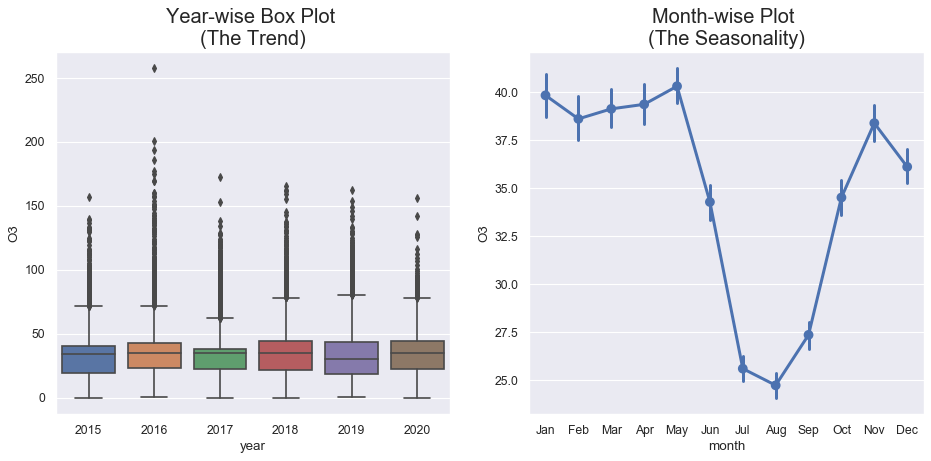

In [17]:
value='O3'
trend_plot(df,value)

In [18]:
df = city_day
df = df[df['Date'] <= ('01-01-2020')] 
df['Vehicular Pollution content'] = df['PM2.5']+df['PM10']+df['NO']+df['NO2']+df['NOx']+df['NH3']+df['CO']
df['Industrial Pollution content'] = df['SO2']+df['O3']+df['Benzene']+df['Toluene']+df['Xylene']
df = df.drop(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
     'O3','Benzene','Toluene','Xylene'],axis=1)
df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24908 entries, 0 to 29348
Data columns (total 9 columns):
Date                            24908 non-null datetime64[ns]
Unnamed: 0                      24908 non-null int64
level_0                         24908 non-null int64
index                           24908 non-null int64
City                            24908 non-null object
AQI                             24908 non-null float64
AQI_Bucket                      24908 non-null object
Vehicular Pollution content     24908 non-null float64
Industrial Pollution content    24908 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 1.9+ MB


/Users/s.sriaravind/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/s.sriaravind/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Date  Unnamed: 0  level_0  index       City         AQI AQI_Bucket  \
0 2015-01-01           0        0      0  Ahmedabad  166.463581   Moderate   
1 2015-01-02           1        1      1  Ahmedabad  166.463581   Moderate   
2 2015-01-03           2        2      2  Ahmedabad  166.463581   Moderate   
3 2015-01-04           3        3      3  Ahmedabad  166.463581   Moderate   
4 2015-01-05           4        4      4  Ahmedabad  166.463581   Moderate   

   Vehicular Pollution content  Industrial Pollution content  
0                   246.271157                        161.02  
1                   243.151157                         71.56  
2                   292.861157                         85.22  
3                   248.911157                         70.24  
4                   312.441157                        107.32

In [19]:
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
def ploting(var):
    df[var].iplot(title=var,xTitle='Levels',yTitle=var, linecolor='black', )
    plt.show()
ploting('Vehicular Pollution content')
ploting('Industrial Pollution content')

In [20]:
def max_bar_plot(var):
    x1 = df[['City',var]].groupby(["City"]).median().sort_values(by = var,
    ascending = True).tail(10).iplot(kind='bar', xTitle='Cities',yTitle=var, 
                                     linecolor='black', title='{2} {1} {0}'.format(")",var,' Most polluted cities('))

p1 = max_bar_plot('Industrial Pollution content')
p2 = max_bar_plot('Vehicular Pollution content')

In [21]:
def min_bar_plot(var):
    x1 = df[['City',var]].groupby(["City"]).mean().sort_values(by = var,
    ascending = True).head(10).iplot(kind='bar', yTitle='Cities',xTitle=var, linecolor='black',title='{2} {1} {0}'.format(")",var,' Minimum polluted cities('))
p1 = min_bar_plot('Industrial Pollution content')
p2 = min_bar_plot('Vehicular Pollution content')

In [22]:
df_aqi = pd.DataFrame(city_day)
df_aqi
df_a = df_aqi[df_aqi.City.isin(["Ahmedabad", "Bengaluru", "Chennai", "Delhi", "Gurugram", "Hyderabad", "Jaipur",
                              "Kolkata", "Lucknow", "Mumbai", "Patna", "Thiruvananthapuram"])]

df_a = df_a[((df_a.Date >= "2019-04-01") & (df_a.Date < "2019-04-10")) | ((df_a.Date >= "2020-04-01") & (df_a.Date < "2020-04-10"))]
df_a["Year"] = pd.to_datetime(df_a.Date).dt.year
df_a = df_a.groupby(["City", "Year"])["AQI"].mean().reset_index()
df_a = df_a.pivot_table(index = "City", columns = "Year", values = "AQI", aggfunc = np.mean).reset_index()
df_a.rename(columns = {2019: "AQI_2019_April", 2020: "AQI_2020_April"}, inplace = True)
df_a["Improvement in AQI"] = round((df_a.AQI_2019_April - df_a.AQI_2020_April) * 100 / df_a.AQI_2019_April, 2)
df_a.AQI_2019_April = df_a.AQI_2019_April.astype(int).astype(str)
df_a.AQI_2020_April = df_a.AQI_2020_April.astype(int).astype(str)
df_a.sort_values("Improvement in AQI", ascending = True,inplace = True)
df_a.columns.name = None

In [23]:
cm = sns.light_palette("green", as_cmap = True)
df_a.style.background_gradient(cmap = cm)

In [24]:
df1 = pd.DataFrame(city_day)
def al(var):
    cities = [var]
    filtered_city_day = df1[df1['Date'] <= '2020-04-01']
    AQI = filtered_city_day[filtered_city_day.City.isin(cities)][['City','AQI_Bucket']]
    AQI[var] = AQI['AQI_Bucket']
    k = AQI[var].value_counts()
    m = pd.DataFrame((round((k/sum(k))*100)))
    return m
c11 = al('Ahmedabad')
c22 = al('Delhi')
c33 = al('Kolkata')
c44 = al('Mumbai')
c55 = al('Bengaluru')
c66 = al('Chennai')
df_row = pd.concat([c11,c22,c33,c44,c55,c66],axis=1)
df_row.iplot(kind='bar', align='center',xTitle='Satisfaction level', yTitle='percentage of satisfaction' ,linecolor='black', title='Satisfaction level of people(Pre COVID19)')

/Users/s.sriaravind/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [25]:
def al(var):
    cities = [var]
    filtered_city_day = df1[df1['Date'] > '2020-04-01']
    AQI = filtered_city_day[filtered_city_day.City.isin(cities)][['City','AQI_Bucket']]
    AQI[var] = AQI['AQI_Bucket']
    k = AQI[var].value_counts()
    m = pd.DataFrame((round((k/sum(k))*100)))
    return m
c11 = al('Ahmedabad')
c22 = al('Delhi')
c33 = al('Kolkata')
c44 = al('Mumbai')
c55 = al('Bengaluru')
c66 = al('Chennai')
df_row = pd.concat([c11,c22,c33,c44,c55,c66],axis=1)
df_row.iplot(kind='bar', align='center',xTitle='Satisfaction level', yTitle='percentage of satisfaction' ,linecolor='black', title='Satisfaction level of people(Post COVID19)')

/Users/s.sriaravind/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [33]:
start_date1 = '2019-01-01'
end_date1 = '2019-05-01'

mask1 = (city_day['Date'] >= start_date1) & (city_day['Date']  <= end_date1)
pollutants_filtered_2019 = city_day.loc[mask1]
pollutants_filtered_2019.fillna(method='bfill',inplace=True)
pollutants_filtered_2019.set_index('Date',inplace=True);

start_date2 = '2020-01-01'
end_date2 = '2020-05-01'

mask2 = (city_day['Date'] >= start_date2) & (city_day['Date']  <= end_date2)
pollutants_filtered_2020 = city_day.loc[mask2]
pollutants_filtered_2020.fillna(method='bfill',inplace=True)
pollutants_filtered_2020.set_index('Date',inplace=True);


df1 = pollutants_filtered_2019[pollutants_filtered_2019.City.isin(cities)][['City','NO2','SO2','PM2.5','CO']]
df2 = pollutants_filtered_2020[pollutants_filtered_2020.City.isin(cities)][['City','NO2','SO2','PM2.5','CO']]

In [34]:
cities_db = pd.read_csv('city.csv')

df11 = pollutants_filtered_2019[['City','AQI']]
df22 = pollutants_filtered_2020[['City','AQI']]

df_2019_coord = df11.groupby('City')['AQI'].mean().to_frame().reset_index()
df_2020_coord = df22.groupby('City')['AQI'].mean().to_frame().reset_index()

df_2019_AQI = pd.merge(df_2019_coord,cities_db,on='City')
df_2019_AQI['AQI'] = df_2019_AQI['AQI'].round(0)
df_2020_AQI = pd.merge(df_2020_coord,cities_db,on='City')
df_2020_AQI['AQI'] = df_2020_AQI['AQI'].round(0)

In [35]:
import folium
from folium import Choropleth, Circle, Marker
from folium import plugins
from folium.plugins import HeatMap, MarkerCluster




m = plugins.DualMap(location=(22.9734, 78.6569), tiles=None, zoom_start=5)

folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('openstreetmap').add_to(m)


fg_1 = folium.FeatureGroup(name='2019').add_to(m.m1)
fg_2 = folium.FeatureGroup(name='2020').add_to(m.m2)



for lat, lon, value, name in zip(df_2019_AQI['Lat'], df_2019_AQI['Long'], df_2019_AQI['AQI'], df_2019_AQI['City']):
    folium.CircleMarker([lat, lon],
                        radius=10,
                        icon=folium.Icon(color='red'),
                        popup = ('<strong>City</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>AQI(Average)</strong>: ' + str(value) + '<br>'),
                        fill_color='red',
                        fill_opacity=0.7 ).add_to(fg_1)





for lat, lon, value, name in zip(df_2020_AQI['Lat'], df_2020_AQI['Long'], df_2020_AQI['AQI'], df_2020_AQI['City']):
    folium.CircleMarker([lat, lon],
                        radius=10,
                        icon=folium.Icon(color='orange'),
                        popup = ('<strong>City</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>AQI(Average)</strong>: ' + str(value) + '<br>'),
                        fill_color='orange',
                        fill_opacity=0.7 ).add_to(fg_2)


folium.LayerControl(collapsed=False).add_to(m)

m

In [29]:

df = city_day
df = df[df['Date'] >= ('01-01-2020')] 
df['Vehicular Pollution content'] = df['PM2.5']+df['PM10']+df['NO']+df['NO2']+df['NOx']+df['NH3']+df['CO']
df['Industrial Pollution content'] = df['SO2']+df['O3']+df['Benzene']+df['Toluene']+df['Xylene']
df = df.drop(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
     'O3','Benzene','Toluene','Xylene'],axis=1)
df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4646 entries, 1826 to 29530
Data columns (total 9 columns):
Date                            4646 non-null datetime64[ns]
Unnamed: 0                      4646 non-null int64
level_0                         4646 non-null int64
index                           4646 non-null int64
City                            4646 non-null object
AQI                             4646 non-null float64
AQI_Bucket                      4646 non-null object
Vehicular Pollution content     4646 non-null float64
Industrial Pollution content    4646 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 363.0+ KB


Date  Unnamed: 0  level_0  index       City    AQI AQI_Bucket  \
1826 2020-01-01        1826     1826   1826  Ahmedabad  216.0       Poor   
1827 2020-01-02        1827     1827   1827  Ahmedabad  162.0   Moderate   
1828 2020-01-03        1828     1828   1828  Ahmedabad  220.0       Poor   
1829 2020-01-04        1829     1829   1829  Ahmedabad  254.0       Poor   
1830 2020-01-05        1830     1830   1830  Ahmedabad  255.0       Poor   

      Vehicular Pollution content  Industrial Pollution content  
1826                   263.863476                         89.52  
1827                   256.303476                         85.00  
1828                   263.913476                         97.88  
1829                   283.723476                        100.41  
1830                   227.573476                        106.40

In [30]:
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
def ploting(var):
    df[var].iplot(title=var,xTitle='Cities',yTitle=var, linecolor='black', )
    plt.show()
ploting('Vehicular Pollution content')
ploting('Industrial Pollution content')

In [31]:
def max_bar_plot(var):
    x1 = df[['City',var]].groupby(["City"]).median().sort_values(by = var,
    ascending = True).tail(10).iplot(kind='bar', xTitle='Cities',yTitle=var, 
                                     linecolor='black', title='{2} {1} {0}'.format(")",var,' Most polluted cities('))

p1 = max_bar_plot('Industrial Pollution content')
p2 = max_bar_plot('Vehicular Pollution content')

In [32]:
def min_bar_plot(var):
    x1 = df[['City',var]].groupby(["City"]).mean().sort_values(by = var,
    ascending = True).head(10).iplot(kind='bar', yTitle='Cities',xTitle=var, linecolor='black',title='{2} {1} {0}'.format(")",var,' Minimum polluted cities('))
p1 = min_bar_plot('Industrial Pollution content')
p2 = min_bar_plot('Vehicular Pollution content')